In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file = "Resources/scrubbed_csv.csv"


ufo_data = pd.read_csv(file)

ufo_data.head()

c:\users\coryo\anaconda3\envs\pythondata\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [4]:
ufo_clean = ufo_data.dropna()


#print(len(ufo_clean))


ufo_clean = ufo_clean.loc[ufo_clean["country"] == "us"]

print(len(ufo_clean))

ufo_clean.head()

63553


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595,-82.188889
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175,-73.408333


In [5]:
ufo_clean[['month', 'day', 'year']] = ufo_clean['datetime'].str.split('/',expand=True)
ufo_clean[['year', 'time']] = ufo_clean['year'].str.split(' ',expand=True)


In [6]:
ufo_clean

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,month,day,year,time
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,10,10,1949,20:30
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,10,10,1956,21:00
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,10,10,1960,20:00
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595,-82.188889,10,10,1961,19:00
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175,-73.408333,10,10,1965,23:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658,-86.784444,9,9,2013,21:15
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136,-116.202500,9,9,2013,22:00
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972,-122.284444,9,9,2013,22:00
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011,-77.265556,9,9,2013,22:20


In [7]:
ufo_month = ufo_clean[["city", "state", "shape", "month", "day", "year", "time", "duration (seconds)" ]]

ufo_all = ufo_month.dropna()

#ufo_month["month"].value_counts()

ufo_all.head()

,city,state,shape,month,day,year,time,duration (seconds)
0,san marcos,tx,cylinder,10,10,1949,20:30,2700
3,edna,tx,circle,10,10,1956,21:00,20
4,kaneohe,hi,light,10,10,1960,20:00,900
5,bristol,tn,sphere,10,10,1961,19:00,300
7,norwalk,ct,disk,10,10,1965,23:45,1200


In [8]:
ufo_all['month'] = pd.to_datetime(ufo_all['month'], format='%m').dt.month_name().str.slice(stop=3)

ufo_all

c:\users\coryo\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,city,state,shape,month,day,year,time,duration (seconds)
0,san marcos,tx,cylinder,Oct,10,1949,20:30,2700
3,edna,tx,circle,Oct,10,1956,21:00,20
4,kaneohe,hi,light,Oct,10,1960,20:00,900
5,bristol,tn,sphere,Oct,10,1961,19:00,300
7,norwalk,ct,disk,Oct,10,1965,23:45,1200
...,...,...,...,...,...,...,...,...
80327,nashville,tn,light,Sep,9,2013,21:15,600
80328,boise,id,circle,Sep,9,2013,22:00,1200
80329,napa,ca,other,Sep,9,2013,22:00,1200
80330,vienna,va,circle,Sep,9,2013,22:20,5


In [9]:
ufo_all["month"].value_counts()

Jul    7468
Aug    6638
Jun    6207
Oct    6067
Sep    6017
Nov    5484
Dec    4482
Jan    4422
Mar    4288
Apr    4282
May    4090
Feb    3654
Name: month, dtype: int64

We wanted to see how many sightings occured in each month. July showed the most activity, while February showed the least activity. We expected seasons to have an effect on sightings and that was spot on. Summer showed the most sightings.

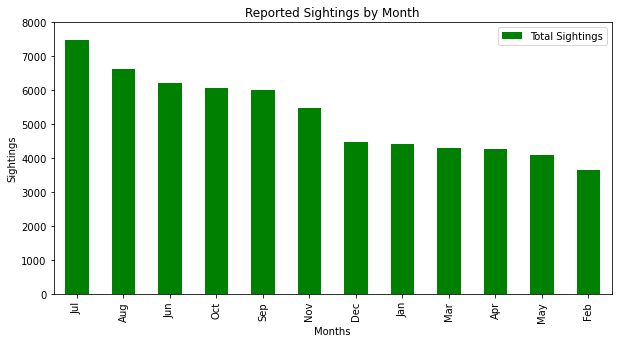

In [10]:
ufo_month_only = ufo_all[["month"]]

month_group = ufo_month_only["month"].unique()

ufo_month_count = ufo_month_only.value_counts()

#ufo_month_count = ufo_month_count.sort_values(ascending=True)

month_counts = pd.DataFrame({"Total Sightings": ufo_month_count})
month_counts.set_index(month_group)
month_counts = month_counts.reset_index()

month_counts

ax1 = month_counts.plot(kind="bar", title="Reported Sightings by Month", xlabel="Months", ylabel="Sightings", align="center",
                  color="green", figsize=(10,5), x="month", y="Total Sightings")
ax1.set_ylim(0, 8000)
plt.show()



The year with the most sightings is 2012, we decided to avoid using years with less than 500 sightings because it didn't seem like the sample size was enough. We noticed as the years were more recent there were more sightings. Unfortunately we don't have any hard data to support why there were more reports. But we think it has something to do with availability of cell phones.

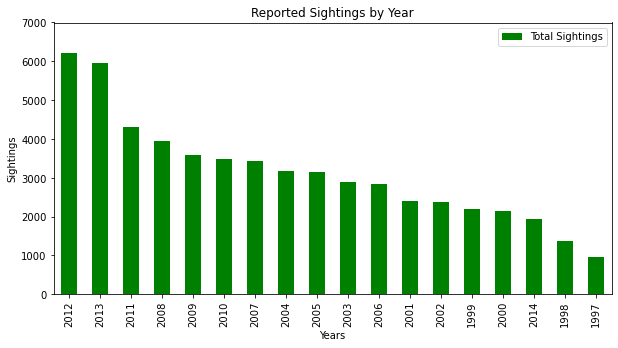

In [11]:
ufo_year_only = ufo_all[["year"]]

year_group = ufo_year_only["year"].unique()
year_group

ufo_year_count = ufo_year_only.value_counts()
#ufo_year_count



year_counts = pd.DataFrame({"Total Sightings": ufo_year_count})
year_counts.set_index(year_group)
year_counts = year_counts.reset_index()
year_counts = year_counts[year_counts["Total Sightings"] > 500] 

year_counts.head()

ax1 = year_counts.plot(kind="bar", title="Reported Sightings by Year", xlabel="Years", ylabel="Sightings", align="center", color="green",
                 figsize=(10,5), x="year", y="Total Sightings")
ax1.set_ylim(0, 7000)
plt.show()

c:\users\coryo\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


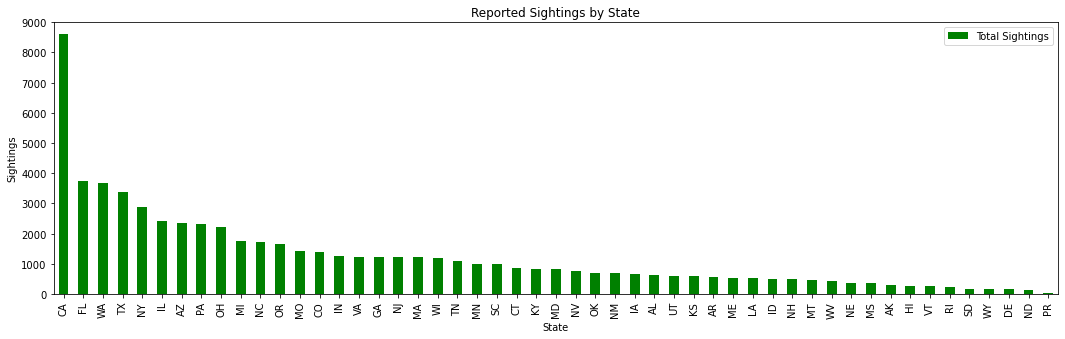

In [60]:
ufo_state_only = ufo_all[["state"]]

for state in ufo_state_only.columns:
    ufo_state_only["state"] = ufo_state_only["state"].str.upper() 

state_group = ufo_state_only["state"].unique()

ufo_state_count = ufo_state_only.value_counts()

#ufo_month_count = ufo_month_count.sort_values(ascending=True)

state_counts = pd.DataFrame({"Total Sightings": ufo_state_count})
state_counts.set_index(state_group)
state_counts = state_counts.reset_index()
state_counts = state_counts[state_counts["Total Sightings"] > 15]

state_counts

ax1 = state_counts.plot(kind="bar", title="Reported Sightings by State", xlabel="State", ylabel="Sightings",
                  color="green", figsize=(18,5), x="state", y="Total Sightings")
ax1.set_ylim(0, 9000)
plt.show()

Light has by far the most sightings, which influences the mean duration of the sightings. Triangle has the second most sightings, but a very low sighting duration time. 

c:\users\coryo\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\coryo\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


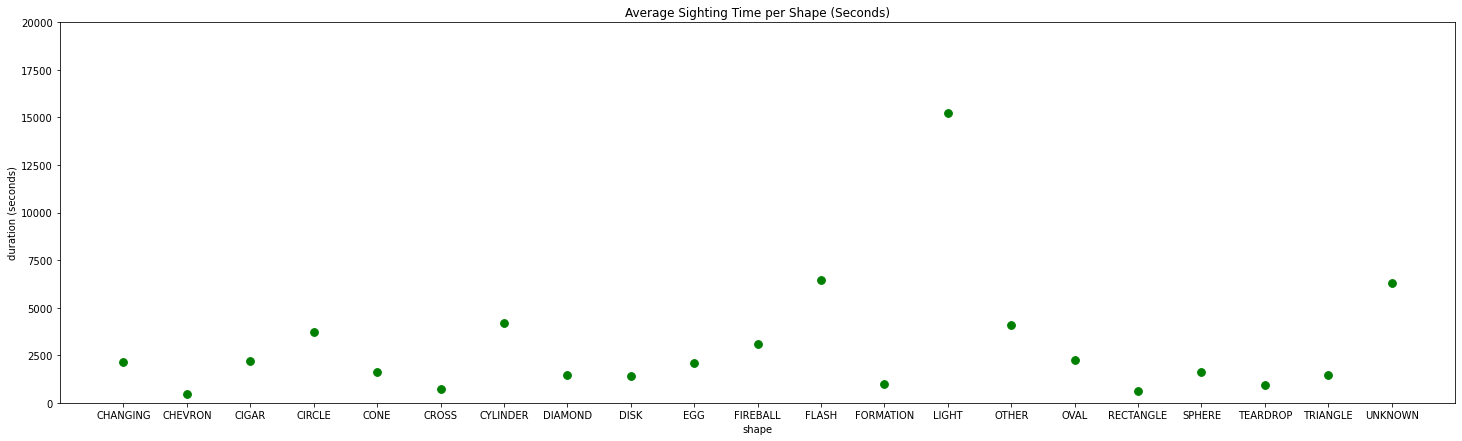

In [47]:
ufo_duration = ufo_all[["shape", "duration (seconds)"]]

for shape in ufo_duration.columns:
    ufo_duration["shape"] = ufo_duration["shape"].str.upper() 


ufo_duration["duration (seconds)"] = ufo_duration["duration (seconds)"].astype("float")

# ufo_shape_count = ufo_duration["shape"].value_counts()
# ufo_shape_count

ufo_shape_duration = ufo_duration.groupby(["shape"]).mean().reset_index()
#ufo_shape_duration = ufo_shape_duration["shape"].drop(["changed", "crescent", "delta", "flare", "hexagon", "pyramid", "round"])

#changed, crescent, delta, flare, hexagon, pyramid, round
#0, 6, 9, 14, 17, 21, 23
# ufo_duration.dtypes

ufo_shape_duration = ufo_shape_duration.drop(ufo_shape_duration.index[[0, 6, 9, 14, 17, 21, 23]])
#ufo_shape_duration.head(30)

ax1 = ufo_shape_duration.plot(kind="scatter", title="Average Sighting Time per Shape (Seconds)", x="shape", y="duration (seconds)",
                              xlabel="Shape", ylabel="Mean Duration (Seconds)", color="green", s=60, figsize=(25,7))

ax1.set_ylim(0, 20000)

plt.show()